<a href="https://colab.research.google.com/github/tiara070403/skripsi/blob/main/Salinan_dari_Skripsi.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install re

ERROR: Could not find a version that satisfies the requirement re (from versions: none)
ERROR: No matching distribution found for re


In [2]:
!pip install Sastrawi
import pandas as pd
import re
import seaborn as sns
import matplotlib.pyplot as pl

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 209.7/209.7 kB 10.0 MB/s eta 0:00:00


In [30]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
import pandas as pd
import re
!pip install Sastrawi
import seaborn as sns
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score
from sklearn.metrics import classification_report
import nltk
!pip install tweet-preprocessor
!pip install textblob
!pip install wordcloud
!pip install nltk
!pip install re
import pandas as pd
import re
import Sastrawi
from Sastrawi.StopWordRemover.StopWordRemoverFactory import StopWordRemoverFactory, StopWordRemover, ArrayDictionary
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
import seaborn as sns
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer, HashingVectorizer
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.pipeline import Pipeline

nltk.download('punkt')
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer, HashingVectorizer
from sklearn.pipeline import Pipeline
from wordcloud import WordCloud, STOPWORDS
from transformers import pipeline

ERROR: Could not find a version that satisfies the requirement re (from versions: none)
ERROR: No matching distribution found for re


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [41]:
df = pd.read_csv("/content/crawling.csv", index_col=0)
df.head()

,created_at,favorite_count,full_text,id_str,image_url,in_reply_to_screen_name,lang,location,quote_count,reply_count,retweet_count,tweet_url,user_id_str,username
conversation_id_str,,,,,,,,,,,,,,
1858070162362204643,Sun Nov 17 08:50:22 +0000 2024,2,lucu banget mahasiswa pencinta alam ini,1858070162362204643,NaN,NaN,in,NaN,0,1,0,https://x.com/undefined/status/185807016236220...,1716269490936360960,NaN
1846529554657239219,Wed Oct 16 12:32:07 +0000 2024,0,Bejat Mahasiswa Pencinta Alam di Jambi 'Genjot...,1846529554657239219,NaN,NaN,in,NaN,0,0,0,https://x.com/undefined/status/184652955465723...,2544978158,NaN
1467691301155979267,Wed Oct 09 13:58:44 +0000 2024,0,@Leonita_Lestari Ada Perkoempoelan Pentjinta A...,1844014639350452258,NaN,Leonita_Lestari,in,NaN,0,0,0,https://x.com/undefined/status/184401463935045...,1810821796767375360,NaN
1836014724523458593,Tue Sep 17 12:09:56 +0000 2024,0,[PRESS RELEASE SOWAN UKM KE UKM UNIT PANDU LIN...,1836014724523458593,https://pbs.twimg.com/media/GXrVp2Wa0AAv3zG.jpg,NaN,in,NaN,0,1,0,https://x.com/undefined/status/183601472452345...,297204645,NaN
1835164951125917967,Sun Sep 15 03:53:14 +0000 2024,0,[PRESS RELEASE SOWAN UKM KE UKM UNIT PANDU LIN...,1835164951125917967,https://pbs.twimg.com/media/GXfQzAtacAAlymL.jpg,NaN,in,NaN,0,1,0,https://x.com/undefined/status/183516495112591...,297204645,NaN


In [42]:
df.shape

(5349, 14)

In [43]:
df = df[['created_at', 'full_text']]

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5349 entries, 1858070162362204643 to 1230765438897815552
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   created_at  5349 non-null   object
 1   full_text   5349 non-null   object
dtypes: object(2)
memory usage: 125.4+ KB


In [8]:
# Menggunakan drop
df['full_text'] = df['full_text'].astype(str).str.lower()
df['full_text'] = df['full_text'].replace('false', pd.NA)
df = df.dropna(subset=['full_text'])

<ipython-input-8-936608380>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['full_text'] = df['full_text'].astype(str).str.lower()
<ipython-input-8-936608380>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['full_text'] = df['full_text'].replace('false', pd.NA)


In [9]:
df.shape

(5349, 2)

In [10]:
df = df.drop_duplicates(subset=['full_text'])

In [11]:
df.duplicated().sum()

np.int64(0)

In [12]:
df = df.dropna()

In [13]:
df.isnull().sum()

,0
created_at,0
full_text,0


In [14]:
df

,created_at,full_text
conversation_id_str,,
1858070162362204643,Sun Nov 17 08:50:22 +0000 2024,lucu banget mahasiswa pencinta alam ini
1846529554657239219,Wed Oct 16 12:32:07 +0000 2024,bejat mahasiswa pencinta alam di jambi 'genjot...
1467691301155979267,Wed Oct 09 13:58:44 +0000 2024,@leonita_lestari ada perkoempoelan pentjinta a...
1836014724523458593,Tue Sep 17 12:09:56 +0000 2024,[press release sowan ukm ke ukm unit pandu lin...
1835164951125917967,Sun Sep 15 03:53:14 +0000 2024,[press release sowan ukm ke ukm unit pandu lin...
...,...,...
1230768955653967873,Fri Feb 21 08:19:20 +0000 2020,setiap orang di dunia ini bisa menjadi #betheh...
1230767649816100868,Fri Feb 21 08:14:08 +0000 2020,kapolri: pelestarian lingkungan merupakan tang...
1230765718263586818,Fri Feb 21 08:06:28 +0000 2020,pelestarian lingkungan merupakan tanggung jawa...


In [15]:
df.shape

(5246, 2)

In [16]:
# Case Folding
df['full_text'] = df['full_text'].str.lower()
df

,created_at,full_text
conversation_id_str,,
1858070162362204643,Sun Nov 17 08:50:22 +0000 2024,lucu banget mahasiswa pencinta alam ini
1846529554657239219,Wed Oct 16 12:32:07 +0000 2024,bejat mahasiswa pencinta alam di jambi 'genjot...
1467691301155979267,Wed Oct 09 13:58:44 +0000 2024,@leonita_lestari ada perkoempoelan pentjinta a...
1836014724523458593,Tue Sep 17 12:09:56 +0000 2024,[press release sowan ukm ke ukm unit pandu lin...
1835164951125917967,Sun Sep 15 03:53:14 +0000 2024,[press release sowan ukm ke ukm unit pandu lin...
...,...,...
1230768955653967873,Fri Feb 21 08:19:20 +0000 2020,setiap orang di dunia ini bisa menjadi #betheh...
1230767649816100868,Fri Feb 21 08:14:08 +0000 2020,kapolri: pelestarian lingkungan merupakan tang...
1230765718263586818,Fri Feb 21 08:06:28 +0000 2020,pelestarian lingkungan merupakan tanggung jawa...


In [17]:
df.shape

(5246, 2)

In [18]:
# Cleaning
def clean_twitter_text(text):
  text = re.sub(r'@[A-Za-z0-9_]+', '', text)
  text = re.sub(r'#\w+', '', text)
  text = re.sub(r'RT[\s]+', '', text)
  text = re.sub(r'https?://\S+', '', text)

  text = re.sub(r'[^A-Za-z0-9 ]', '', text)
  text = re.sub(r'\s+', ' ', text).strip()

  return text

df['full_text'] = df['full_text'].apply(clean_twitter_text)


In [19]:
df

,created_at,full_text
conversation_id_str,,
1858070162362204643,Sun Nov 17 08:50:22 +0000 2024,lucu banget mahasiswa pencinta alam ini
1846529554657239219,Wed Oct 16 12:32:07 +0000 2024,bejat mahasiswa pencinta alam di jambi genjot ...
1467691301155979267,Wed Oct 09 13:58:44 +0000 2024,ada perkoempoelan pentjinta alam yang lahir th...
1836014724523458593,Tue Sep 17 12:09:56 +0000 2024,press release sowan ukm ke ukm unit pandu ling...
1835164951125917967,Sun Sep 15 03:53:14 +0000 2024,press release sowan ukm ke ukm unit pandu ling...
...,...,...
1230768955653967873,Fri Feb 21 08:19:20 +0000 2020,setiap orang di dunia ini bisa menjadi untuk l...
1230767649816100868,Fri Feb 21 08:14:08 +0000 2020,kapolri pelestarian lingkungan merupakan tangg...
1230765718263586818,Fri Feb 21 08:06:28 +0000 2020,pelestarian lingkungan merupakan tanggung jawa...


In [44]:
# Fungsi filter_tokens_by_length
def filter_tokens_by_length(df, column, min_words, max_words):
    # Tokenisasi kata
    words_count = df[column].astype(str).apply(lambda x: len(x.split()))
    # Filter untuk jumlah kata
    mask = (words_count >= min_words) & (words_count <= max_words)
    # Mengaplikasikan filter ke DataFrame
    filtered_df = df[mask]
    return filtered_df

# Filter_tokens_by_length untuk mendapatkan baris
min_words = 2
max_words = 5246
df = filter_tokens_by_length(df, 'full_text', min_words, max_words)

In [45]:
# Normalisasi Data
norm = {' mikir2 ':' mikir ', 'perkoempoelan':'perkumpulan', 'sowan':'menghadap', 'genjot':'menyerang', 'wkwkw':'hahaha', 'gtgtgt':'.', 'th':'tahun', 'ukamu':'ukm', 'bejat':'rusak', 'pentjinta':'pencinta', 'pecinta':'pencinta', ' siaaapp ':' siap ', 'okaaay ':'oke ', 'udh ':'sudah ','ga ':'tidak ',' gaskeun':' ayo ', 'wowww ':'wow ', ' haaayyuukkk ':' ayo ', ' yg ':' yang ', ' udh ':' udah ', 'wkwk ':' ', ' min ':' kak ', ' malem ':' malam', ' malem2 ':' malam ', ' sm ':' sama ', ' dy ':' dia ', ' lg ':' lagi ', ' skrg ':' sekarang ', ' ddpn ':' didepan ', ' makasi ':' makasih ', ' pertamaz ':' pertamax ', ' jg ':' juga ', ' donk ':' dong ', ' ikutann ':' ikutan ', ' banyakk ':' banyak ', ' twt ':' tweet', 'mantaap ':'mantap ', ' juarak':' juara ', 'daridulu ':'dari dulu ', 'siapp ':'siap ', ' gamau ':' tidak mau ', ' sll ':' selalu ', ' qu ':' aku ', ' krn ':' karena ', ' irii':' iri', ' muluu ':' terus ', 'mada ':'masa ', 'jgn ':'jangan ', ' jgn ':' jangan ', ' muluuu ':' terus ', 'ntar ':'nanti ', ' awtnya':' awetnya', 'gg ':'keren ', ' kerennn':' keren ', ' bisaa ':' bisa ', 'gaaa':'tidak ', " yg ": " yang ", ' nyampe':' sampai', ' nyampe ':' sampai ', ' lu ':' kamu ', ' ikhlaaasss ':' ikhlas ', ' gak ':' tidak ', ' klo ':' kalo ', ' amp ': ' sampai ', ' ga ':' tidak ', ' yaaaa':' ya ', 'betolll ':'betul ', ' kaga ':' tidak ', ' idk ':' tidak tahu ', ' jkt ':' jakarta ', ' lo ':' kamu ', ' bjir ':' ', ' kek ':' seperti ', ' yg ':' yang ', ' utk ':' untuk ', 'kismin ':'miskin ', ' kismin ':' miskin ', ' pd ':' pada ', ' dgn ':' dengan ', ' ituu ':' itu ', ' jg ':' juga ', 'yoi':'iya ', ' yoi ':' iya ', 'org2 ':'orang ', ' tak ':' tidak ', ' kyk ':' seperti ', ' sbg ':' sebagai ', ' anjjjj ':' ', ' bgt ':' banget ', 'km ':'kamu ', ' km ':' kamu', ' byk ':' banyak ', ' lg ':' lagi ', ' mrk ':' mereka ', ' blm ':' belum '}

def normalisasi(str_text):
  for i in norm:
    str_text = str_text.replace(i, norm[i])
  return str_text

df['full_text'] = df['full_text'].apply(lambda x: normalisasi(x))
df

,created_at,full_text
conversation_id_str,,
1858070162362204643,Sun Nov 17 08:50:22 +0000 2024,lucu banget mahasiswa pencinta alam ini
1846529554657239219,Wed Oct 16 12:32:07 +0000 2024,Bejat Mahasiswa Pencinta Alam di Jambi 'Genjot...
1467691301155979267,Wed Oct 09 13:58:44 +0000 2024,@Leonita_Lestari Ada Perkoempoelan Pentjinta A...
1836014724523458593,Tue Sep 17 12:09:56 +0000 2024,[PRESS RELEASE SOWAN UKM KE UKM UNIT PANDU LIN...
1835164951125917967,Sun Sep 15 03:53:14 +0000 2024,[PRESS RELEASE SOWAN UKM KE UKM UNIT PANDU LIN...
...,...,...
1230768955653967873,Fri Feb 21 08:19:20 +0000 2020,Setiap orang di dunia ini bisa menjadi #BeTheH...
1230767649816100868,Fri Feb 21 08:14:08 +0000 2020,Kapolri: pelestarian lingkungan merupakan tang...
1230765718263586818,Fri Feb 21 08:06:28 +0000 2020,Pelestarian Lingkungan Merupakan Tanggung Jawa...


In [46]:
# Stopwords Removal
import Sastrawi
from Sastrawi.StopWordRemover.StopWordRemoverFactory import StopWordRemoverFactory, StopWordRemover, ArrayDictionary
more_stop_words = ['anjayyy']

stop_words = StopWordRemoverFactory().get_stop_words()
stop_words.extend(more_stop_words)

new_array = ArrayDictionary(stop_words)
stop_words_remover_new = StopWordRemover(new_array)

def stopword(str_text):
  str_text = stop_words_remover_new.remove(str_text)
  return str_text

df['full_text'] = df['full_text'].apply(lambda x: stopword(x))
df

,created_at,full_text
conversation_id_str,,
1858070162362204643,Sun Nov 17 08:50:22 +0000 2024,lucu banget mahasiswa pencinta alam
1846529554657239219,Wed Oct 16 12:32:07 +0000 2024,Bejat Mahasiswa Pencinta Alam Jambi 'Genjot Pa...
1467691301155979267,Wed Oct 09 13:58:44 +0000 2024,@Leonita_Lestari Ada Perkoempoelan Pentjinta A...
1836014724523458593,Tue Sep 17 12:09:56 +0000 2024,[PRESS RELEASE SOWAN UKM KE UKM UNIT PANDU LIN...
1835164951125917967,Sun Sep 15 03:53:14 +0000 2024,[PRESS RELEASE SOWAN UKM KE UKM UNIT PANDU LIN...
...,...,...
1230768955653967873,Fri Feb 21 08:19:20 +0000 2020,Setiap orang dunia bisa menjadi #BeTheHero lin...
1230767649816100868,Fri Feb 21 08:14:08 +0000 2020,Kapolri: pelestarian lingkungan merupakan tang...
1230765718263586818,Fri Feb 21 08:06:28 +0000 2020,Pelestarian Lingkungan Merupakan Tanggung Jawa...


In [23]:
# Tokenisasi
tokenized = df['full_text'].apply(lambda x:x.split())
tokenized

,full_text
conversation_id_str,
1858070162362204643,"[lucu, banget, mahasiswa, pencinta, alam]"
1846529554657239219,"[rusak, mahasiswa, pencinta, alam, jambi, meny..."
1467691301155979267,"[perkumpulan, pencinta, alam, lahir, tahun, 19..."
1836014724523458593,"[press, release, menghadap, ukamu, ukamu, unit..."
1835164951125917967,"[press, release, menghadap, ukamu, ukamu, unit..."
...,...
1230768955653967873,"[orang, dunia, bisa, menjadi, lingkungan, seki..."
1230767649816100868,"[kapolri, pelestarian, lingkungan, merupakan, ..."
1230765718263586818,"[pelestarian, lingkungan, merupakan, tanggung,..."


In [24]:
# Tokenized
tokenized = df['full_text'].apply(lambda x:x.split())
tokenized

,full_text
conversation_id_str,
1858070162362204643,"[lucu, banget, mahasiswa, pencinta, alam]"
1846529554657239219,"[rusak, mahasiswa, pencinta, alam, jambi, meny..."
1467691301155979267,"[perkumpulan, pencinta, alam, lahir, tahun, 19..."
1836014724523458593,"[press, release, menghadap, ukamu, ukamu, unit..."
1835164951125917967,"[press, release, menghadap, ukamu, ukamu, unit..."
...,...
1230768955653967873,"[orang, dunia, bisa, menjadi, lingkungan, seki..."
1230767649816100868,"[kapolri, pelestarian, lingkungan, merupakan, ..."
1230765718263586818,"[pelestarian, lingkungan, merupakan, tanggung,..."


In [47]:
# Stemming
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory

def stemming(text_cleaning):
  factory = StemmerFactory()
  stemmer = factory.create_stemmer()
  do = []
  for w in text_cleaning:
    dt = stemmer.stem(w)
    do.append(dt)
  d_clean = []
  d_clean = " ".join(do)
  print(d_clean)
  return d_clean

tokenized = tokenized.apply(stemming)
df


lucu banget mahasiswa cinta alam
rusak mahasiswa cinta alam jambi serang paksa teman kampus rekam
kumpul cinta alam lahir tahun 1953 diri awibowo jutidak terbit majalah cinta alam sehingtidak istilah cinta alam familiar masyarakat jauh soe hok gie diri mahasiswa cinta alam univ indonesia
press release hadap ukamu ukamu unit pandu lingkung mahasiswa cinta alam halo gensoed langsung giat menteri negeri bem unsoed hadap upl mpa jumat 13 september 2024 pukul 1900 sd 2050 wib luring sekre upl mpa
press release hadap ukamu ukamu unit pandu lingkung mahasiswa cinta alam halo gensoed langsung giat menteri negeri bem unsoed hadap upl mpa jumat 13 september 2024 pukul 1900 sd 2050 wib luring sekre upl mpa
mapala mahasiswa cinta alam macam apa kamu kocak negara udah obok obok rezim enak nya elu bilang orang demo ikut ikut di tunggang politik dih padahal anak kuliah loh tingkah e kaya napak tanah pikir ngtidak berimpact hidup kampus
mapagama tapak bumi andalas 12 hari panjat tebing lama mahasiswa 

KeyboardInterrupt: 

In [31]:
df.shape

(5235, 2)

In [32]:
df = pd.read_csv('/content/datahasil_preprocessingData.csv')
df

,full_text
0,lucu banget mahasiswa cinta alam
1,rusak mahasiswa cinta alam jambi serang paksa ...
2,kumpul cinta alam lahir tahun 1953 diri awibow...
3,press release sowan ukamu ukamu unit pandu lin...
4,press release sowan ukamu ukamu unit pandu lin...
...,...
5230,orang dunia jadi lingkung sekitar terap bagai ...
5231,kapolri lestari lingkung rupa tanggung jawab m...
5232,lestari lingkung rupa tanggung jawab moral sama
5233,kapolri lestari lingkung rupa tanggung jawab m...


In [48]:
# Labeling
data_tweet = list(df['full_text'])

polaritas = 0

status = []
total_positif = total_negatif = total_netral = total = 0


for i, tweet in enumerate(data_tweet):

  from textblob import TextBlob
  analysis = TextBlob(tweet)
  polaritas += analysis.polarity

  if analysis.sentiment.polarity > 0.0:
    total_positif += 1
    status.append('Positif')
  elif analysis.sentiment.polarity == 0.0:
    total_netral += 1
    status.append('Netral')
  else :
    total_negatif += 1
    status.append ('Negatif')

  total += 1

print(f'Hasil Analisis Data:\nPositif = {total_positif}\nNetral = {total_netral}\nNegatif = {total_negatif}')
print(f'\nTotal Data: {total}')


Hasil Analisis Data:
Positif = 306
Netral = 4899
Negatif = 142

Total Data: 5347


In [50]:
df['klasifikasi'] = status
df

,created_at,full_text,klasifikasi
conversation_id_str,,,
1858070162362204643,Sun Nov 17 08:50:22 +0000 2024,lucu banget mahasiswa pencinta alam,Netral
1846529554657239219,Wed Oct 16 12:32:07 +0000 2024,Bejat Mahasiswa Pencinta Alam Jambi 'Genjot Pa...,Netral
1467691301155979267,Wed Oct 09 13:58:44 +0000 2024,@Leonita_Lestari Ada Perkoempoelan Pentjinta A...,Positif
1836014724523458593,Tue Sep 17 12:09:56 +0000 2024,[PRESS RELEASE SOWAN UKM KE UKM UNIT PANDU LIN...,Netral
1835164951125917967,Sun Sep 15 03:53:14 +0000 2024,[PRESS RELEASE SOWAN UKM KE UKM UNIT PANDU LIN...,Netral
...,...,...,...
1230768955653967873,Fri Feb 21 08:19:20 +0000 2020,Setiap orang dunia bisa menjadi #BeTheHero lin...,Netral
1230767649816100868,Fri Feb 21 08:14:08 +0000 2020,Kapolri: pelestarian lingkungan merupakan tang...,Netral
1230765718263586818,Fri Feb 21 08:06:28 +0000 2020,Pelestarian Lingkungan Merupakan Tanggung Jawa...,Netral


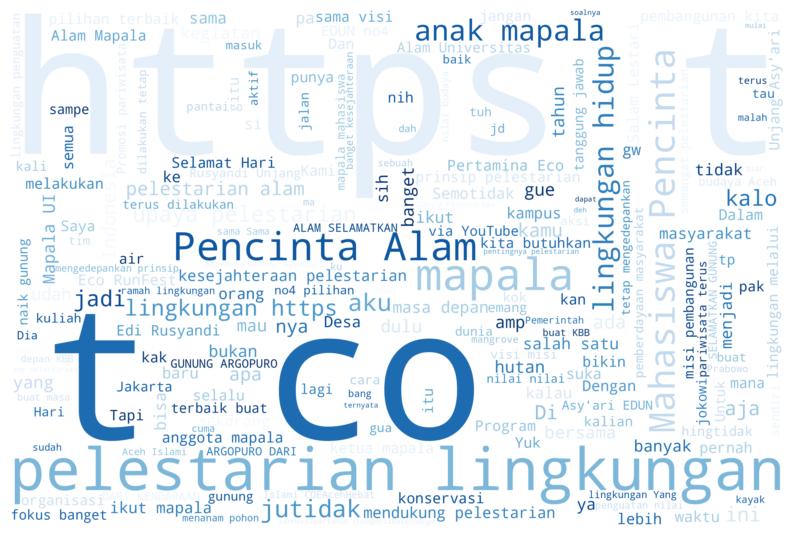

,created_at,full_text,klasifikasi
conversation_id_str,,,
1858070162362204643,Sun Nov 17 08:50:22 +0000 2024,lucu banget mahasiswa pencinta alam,Netral
1846529554657239219,Wed Oct 16 12:32:07 +0000 2024,Bejat Mahasiswa Pencinta Alam Jambi 'Genjot Pa...,Netral
1467691301155979267,Wed Oct 09 13:58:44 +0000 2024,@Leonita_Lestari Ada Perkoempoelan Pentjinta A...,Positif
1836014724523458593,Tue Sep 17 12:09:56 +0000 2024,[PRESS RELEASE SOWAN UKM KE UKM UNIT PANDU LIN...,Netral
1835164951125917967,Sun Sep 15 03:53:14 +0000 2024,[PRESS RELEASE SOWAN UKM KE UKM UNIT PANDU LIN...,Netral
...,...,...,...
1230768955653967873,Fri Feb 21 08:19:20 +0000 2020,Setiap orang dunia bisa menjadi #BeTheHero lin...,Netral
1230767649816100868,Fri Feb 21 08:14:08 +0000 2020,Kapolri: pelestarian lingkungan merupakan tang...,Netral
1230765718263586818,Fri Feb 21 08:06:28 +0000 2020,Pelestarian Lingkungan Merupakan Tanggung Jawa...,Netral


In [55]:
# Visualisasi
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt

def plot_cloud(wordcloud):
  plt.figure(figsize=(10, 8))
  plt.imshow(wordcloud, interpolation='bilinear')
  plt.axis('off')
  plt.show()

all_word= ' '.join([tweet for tweet in df['full_text']])

wordcloud = WordCloud(
    width=3000,
    height=2000,
    random_state=3,
    background_color='white',
    colormap='Blues_r',

    stopwords=STOPWORDS
).generate(all_word)

plot_cloud(wordcloud)

df

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_theme()

label = ['Positif', 'Netral', 'Negatif']
count = [total_positif, total_netral, total_negatif]

def show_bar_chart(labels, counts, tittle):
  fig, ax = plt.subplots(figsize=(8, 6))
  bars = ax.bar(labels, counts, color= ['#2394f7', '#f72323', '#fac343'])

  for bar, count in zip(bars, counts):
    height = bar.get_height()
    ax.annotate(f'{count}', xy=(bar.get_x() + bar.get_width() / 2, height),
                xytext= (0, 3),
                textcoords="offset points",
                ha='center', va='bottom')

  ax.grid(axis='y', linestyle='--', alpha=0.7)

  ax.set_xlabel('Sentimen')
  ax.set_ylabel('Jumlah')
  ax.set_title(tittle)

  plt.show()

show_bar_chart(label, count, "Peran Mahasiswa Pencinta Alam dalam Pelestarian Lingkungan")

In [57]:
# Klasifikasi
dataset = df.drop(['full_text'], axis=1, inplace=False)
dataset = [tuple(x) for x in dataset.to_records(index=False)]

In [58]:
df

,created_at,full_text,klasifikasi
conversation_id_str,,,
1858070162362204643,Sun Nov 17 08:50:22 +0000 2024,lucu banget mahasiswa pencinta alam,Netral
1846529554657239219,Wed Oct 16 12:32:07 +0000 2024,Bejat Mahasiswa Pencinta Alam Jambi 'Genjot Pa...,Netral
1467691301155979267,Wed Oct 09 13:58:44 +0000 2024,@Leonita_Lestari Ada Perkoempoelan Pentjinta A...,Positif
1836014724523458593,Tue Sep 17 12:09:56 +0000 2024,[PRESS RELEASE SOWAN UKM KE UKM UNIT PANDU LIN...,Netral
1835164951125917967,Sun Sep 15 03:53:14 +0000 2024,[PRESS RELEASE SOWAN UKM KE UKM UNIT PANDU LIN...,Netral
...,...,...,...
1230768955653967873,Fri Feb 21 08:19:20 +0000 2020,Setiap orang dunia bisa menjadi #BeTheHero lin...,Netral
1230767649816100868,Fri Feb 21 08:14:08 +0000 2020,Kapolri: pelestarian lingkungan merupakan tang...,Netral
1230765718263586818,Fri Feb 21 08:06:28 +0000 2020,Pelestarian Lingkungan Merupakan Tanggung Jawa...,Netral


In [59]:
import random

set_positif = []
set_negatif = []
set_netral = []

for n in dataset:
  if(n[1] == 'Positif'):
    set_positif.append(n)
  elif(n[1] == 'Negatif'):
    set_negatif.append(n)
  else:
    set_netral.append(n)

set_positif = random.sample(set_positif, k=int(len(set_positif)/2))
set_negatif = random.sample(set_negatif, k=int(len(set_negatif)/2))
set_netral = random.sample(set_netral, k=int(len(set_netral)/2))

train = set_positif + set_negatif + set_netral

train_set = []

for n in train:
  train_set.append(n)

In [60]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [61]:
!python -m textblob.download_corpora

[nltk_data] Downloading package brown to /root/nltk_data...
[nltk_data]   Unzipping corpora/brown.zip.
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package averaged_perceptron_tagger_eng to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger_eng.zip.
[nltk_data] Downloading package conll2000 to /root/nltk_data...
[nltk_data]   Unzipping corpora/conll2000.zip.
[nltk_data] Downloading package movie_reviews to /root/nltk_data...
[nltk_data]   Unzipping corpora/movie_reviews.zip.
Finished.


In [62]:
# Akurasi
from textblob.classifiers import NaiveBayesClassifier

cl = NaiveBayesClassifier(train_set)
print("Akurasi Test: ", cl.accuracy(dataset))

Akurasi Test:  0.9162146998316814


In [64]:
# Labeling
data_tweet = list(df['full_text'])

polaritas = 0

status = []
total_positif = total_negatif = total_netral = total = 0


for i, tweet in enumerate(data_tweet):
  analysis = TextBlob(tweet, classifier=cl)

  if analysis.classify() == 'Positif':
    total_positif += 1
  elif analysis.classify() == 'Netral':
    total_netral += 1
  else :
    total_negatif += 1

  status.append(analysis.classify())
  total += 1

print(f'Hasil Analisis Data:\nPositif = {total_positif}\nNetral = {total_netral}\nNegatif = {total_negatif}')
print(f'\nTotal Data: {total}')

Hasil Analisis Data:
Positif = 0
Netral = 5347
Negatif = 0

Total Data: 5347


In [65]:
df

,created_at,full_text,klasifikasi
conversation_id_str,,,
1858070162362204643,Sun Nov 17 08:50:22 +0000 2024,lucu banget mahasiswa pencinta alam,Netral
1846529554657239219,Wed Oct 16 12:32:07 +0000 2024,Bejat Mahasiswa Pencinta Alam Jambi 'Genjot Pa...,Netral
1467691301155979267,Wed Oct 09 13:58:44 +0000 2024,@Leonita_Lestari Ada Perkoempoelan Pentjinta A...,Positif
1836014724523458593,Tue Sep 17 12:09:56 +0000 2024,[PRESS RELEASE SOWAN UKM KE UKM UNIT PANDU LIN...,Netral
1835164951125917967,Sun Sep 15 03:53:14 +0000 2024,[PRESS RELEASE SOWAN UKM KE UKM UNIT PANDU LIN...,Netral
...,...,...,...
1230768955653967873,Fri Feb 21 08:19:20 +0000 2020,Setiap orang dunia bisa menjadi #BeTheHero lin...,Netral
1230767649816100868,Fri Feb 21 08:14:08 +0000 2020,Kapolri: pelestarian lingkungan merupakan tang...,Netral
1230765718263586818,Fri Feb 21 08:06:28 +0000 2020,Pelestarian Lingkungan Merupakan Tanggung Jawa...,Netral


In [67]:
status = pd.DataFrame({"Klasifikasi Bayes" : status})
df['klasifikasi_bayes'] = status

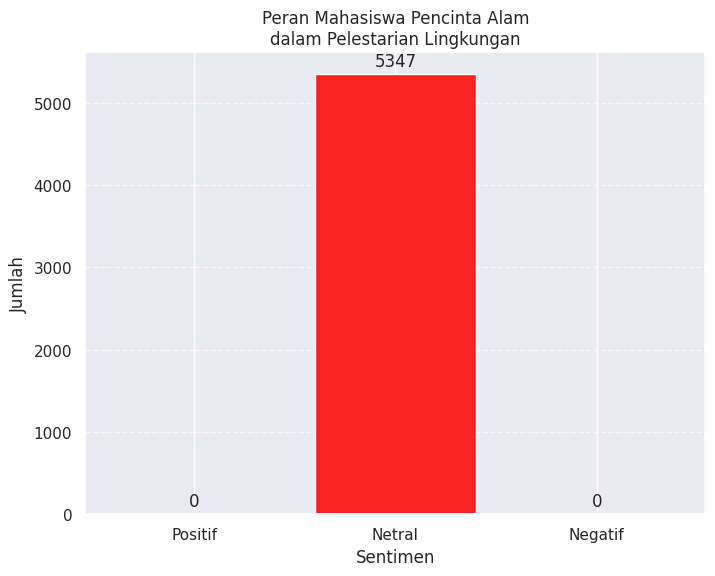

In [68]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_theme()

label = ['Positif', 'Netral', 'Negatif']
count = [total_positif, total_netral, total_negatif]

def show_bar_chart(labels, counts, tittle):
  fig, ax = plt.subplots(figsize=(8, 6))
  bars = ax.bar(labels, counts, color= ['#2394f7', '#f72323', '#fac343'])

  for bar, count in zip(bars, counts):
    height = bar.get_height()
    ax.annotate(f'{count}', xy=(bar.get_x() + bar.get_width() / 2, height),
                xytext= (0, 3),
                textcoords="offset points",
                ha='center', va='bottom')

  ax.grid(axis='y', linestyle='--', alpha=0.7)

  ax.set_xlabel('Sentimen')
  ax.set_ylabel('Jumlah')
  ax.set_title(tittle)

  plt.show()

show_bar_chart(label, count, "Peran Mahasiswa Pencinta Alam dalam Pelestarian Lingkungan")

In [ ]:
data

In [ ]:
# Data Evaluasi
data_eval = [tuple(x) for x in data.to_records(index=False)]

for n in data_eval:
  if len(n) >= 4:
    if n[2] != n[3]:
      print(f'Text: {n[0]}\nClassifier: {n[2]}\nClassifiier Bayes: {n[3]} \n')
  else:
    print("Tuple tidak memiliki cukup elemen.")



In [ ]:
data.shape